<a href="https://colab.research.google.com/github/ManuelOtt-code/Project-DC/blob/master/From_AODB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataset_initial = pd.read_excel("") # TODO: Complete the command to get the DataFrame from the csv file

# Print the first 5 rows of the dataset
dataset_initial.head()

AOX ID                                             SMILES  \
0  AOXMO26283  CC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC...   
1  AOXMO26284  CCC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(=O)CC)c(...   
2  AOXMO26285  COc1cc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2...   
3  AOXMO26286  CC(=O)Oc1ccc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC(...   
4  AOXMO26287  COc1cc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2=...   

                                               InChI Molecular Formula  \
0  InChI=1S/C28H26O9/c1-16(29)34-24-10-8-20(14-26...          C28H26O9   
1  InChI=1S/C28H30O7/c1-5-26(29)34-22-12-10-18(16...          C28H30O7   
2  InChI=1S/C26H26O7/c1-16(27)32-22-10-8-18(14-24...          C26H26O7   
3  InChI=1S/C27H24O9/c1-15(28)33-23-9-5-19(13-25(...          C27H24O9   
4  InChI=1S/C25H24O7/c1-15(26)31-21-9-5-17(13-23(...          C25H24O7   

   Molecular Weight  AlogP  HBD  HBA  Polar Surface Area  Rotatable Bonds  \
0             506.5   4.61    0    9               122.3                6   
1             478.5   5.55    0    7                88.1                8   
2             450.5   4.77    0    7                88.1                6   
3             492.5   4.22    0    9               122.3                6   
4             436.5   4.38    0    7                88.1                6   

   ...  Assay Type  Activity Comment  Target Organism  Protein Target Name  \
0  ...           F               NaN              NaN   NON-PROTEIN TARGET   
1  ...           F               NaN              NaN   NON-PROTEIN TARGET   
2  ...           F               NaN              NaN   NON-PROTEIN TARGET   
3  ...           F               NaN              NaN   NON-PROTEIN TARGET   
4  ...           F               NaN              NaN   NON-PROTEIN TARGET   

   Experimental Data  Target ChEMBL ID Target Pref Name  Cell Line Target  \
0  IC50 >= 100000 nM     CHEMBL3879801              NaN               NaN   
1  IC50 >= 100000 nM     CHEMBL3879801              NaN               NaN   
2  IC50 >= 100000 nM     CHEMBL3879801              NaN               NaN   
3  IC50 >= 100000 nM     CHEMBL3879801              NaN               NaN   
4  IC50 >= 100000 nM     CHEMBL3879801              NaN               NaN   

   Solubility  Solubility Level  
0      -4.394                 2  
1      -5.943                 2  
2      -5.135                 2  
3      -4.033                 2  
4      -4.754                 2  

[5 rows x 34 columns]

In [ ]:
import re

df = pd.DataFrame(dataset_initial)

# Function to parse the Experimental Data column
def parse_experimental_data(row):
    # Use regex to extract components
    match = re.match(r'(IC50|EC50)\s*(>=|>|=)\s*([\d.]+)\s*(nM|ug\.mL-1|µg\.mL-1)', row)
    if match:
        return {
            'activity_type': match.group(1),
            'operator': match.group(2),
            'activity_value': float(match.group(3)),
            'units': match.group(4).replace('.', '')  # Remove dots (e.g., ug.mL-1 -> ugmL-1)
        }
    else:
        return None

# Apply parsing and expand into new columns
parsed_data = df['Experimental Data'].apply(parse_experimental_data).apply(pd.Series)

# Combine with original DataFrame
df = pd.concat([df, parsed_data], axis=1)

# Display results
print(df)

          AOX ID                                             SMILES  \
0     AOXMO26283  CC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC...   
1     AOXMO26284  CCC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(=O)CC)c(...   
2     AOXMO26285  COc1cc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2...   
3     AOXMO26286  CC(=O)Oc1ccc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC(...   
4     AOXMO26287  COc1cc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2=...   
...          ...                                                ...   
5165  AOXMO04063         O=C(CC1SC(=O)NC1=O)Nc1nc(-c2ccc(Cl)cc2)cs1   
5166  AOXMO04064             O=C(CC1SC(=O)NC1=O)Nc1nc(-c2ccccc2)cs1   
5167  AOXMO19507  CN(C)CCN(CC1CCCN(C2Cc3ccccc3C2)C1)C(=O)c1cc2cc...   
5168  AOXMO30152  CCCCCCCCCCCC(=O)Nc1cc2c(cc1F)c(=O)c(C(=O)OCC)c...   
5169  AOXMO30156  CCCCCCCCCCCCCCCC(=O)Nc1cc2c(cc1F)c(=O)c(C(=O)O...   

                                                  InChI Molecular Formula  \
0     InChI=1S/C28H26O9/c1-16(29)34-24-10-8-20(14-26...          C28H2

In [ ]:
import numpy as np
def convert_units(row):
    """Proper unit conversion with consistent numeric output"""
    # Check if conversion is needed and possible
    if (row['units'] == 'ugmL-1' and
        'Molecular Weight' in row and
        not pd.isna(row['Molecular Weight']) and
        not pd.isna(row['activity_value'])):

        # Convert µg/mL to nM: (µg/mL * 10^6) / (g/mol) = nM
        return round((float(row['activity_value']) * 10**6) / float(row['Molecular Weight']))

    # Return original value if already in nM or no conversion possible
    elif row['units'] == 'nM' and not pd.isna(row['activity_value']):
        return float(row['activity_value'])

    # Return NaN for unconvertable cases
    return np.nan

# Apply conversion and force float dtype
df['value_nM'] = df.apply(convert_units, axis=1).astype(float)

float64


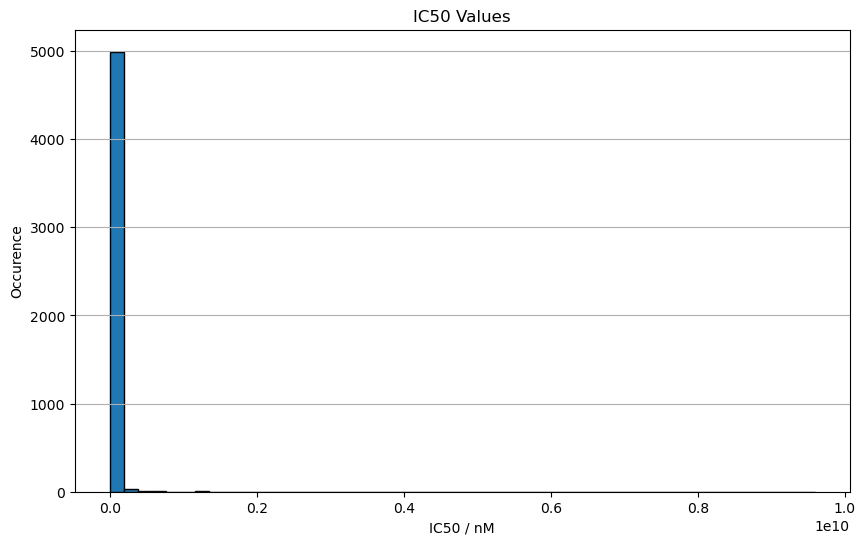

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Histogram of activity_value
plt.figure(figsize=(10, 6))
plt.hist(df['value_nM'], bins=50, edgecolor='black')
plt.title('IC50 Values')
plt.xlabel('IC50 / nM')
plt.ylabel('Occurence')
plt.grid(axis='y')

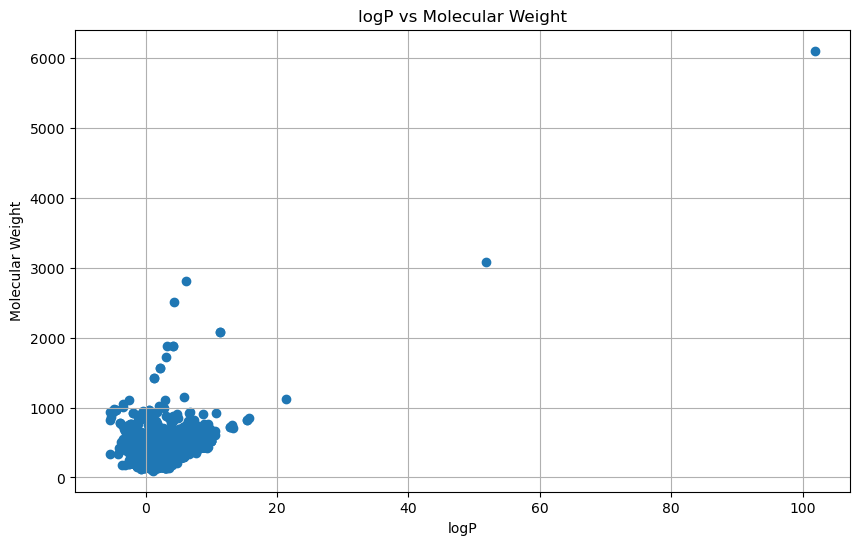

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AlogP'], df['Molecular Weight'])
plt.title('logP vs Molecular Weight')
plt.xlabel('logP')
plt.ylabel('Molecular Weight')
plt.grid(True)

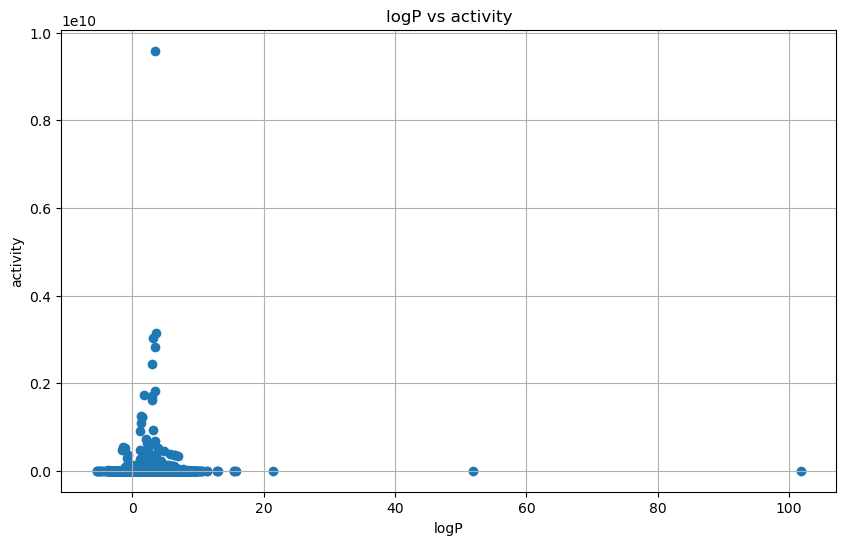

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['AlogP'], df['value_nM'])
plt.title('logP vs activity')
plt.xlabel('logP')
plt.ylabel('activity')
plt.grid(True)

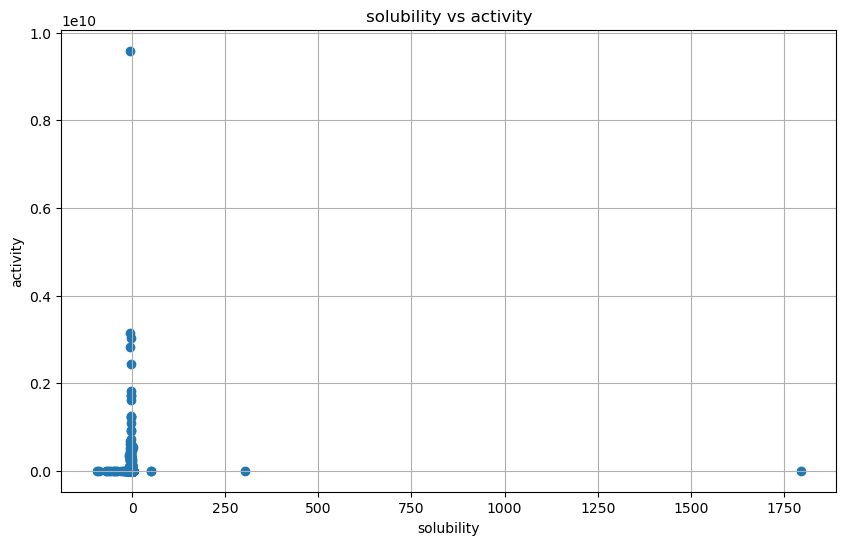

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Solubility'], df['value_nM'])
plt.title('solubility vs activity')
plt.xlabel('solubility')
plt.ylabel('activity')
plt.grid(True)

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
df

AOX ID                                             SMILES  \
0     AOXMO26283  CC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC...   
1     AOXMO26284  CCC(=O)Oc1ccc(/C=C2\CCC/C(=C\c3ccc(OC(=O)CC)c(...   
2     AOXMO26285  COc1cc(/C=C2\CCC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2...   
3     AOXMO26286  CC(=O)Oc1ccc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC(...   
4     AOXMO26287  COc1cc(/C=C2\CC/C(=C\c3ccc(OC(C)=O)c(OC)c3)C2=...   
5     AOXMO26288         O=C1/C(=C/c2ccc(F)cc2)CCC/C1=C\c1ccc(F)cc1   
6     AOXMO26289  O=C1/C(=C/c2ccc([N+](=O)[O-])cc2)CCC/C1=C\c1cc...   
7     AOXMO26290  COc1ccc(/C=C2\CCC/C(=C\c3ccc(OC)c(OC)c3)C2=O)c...   
8     AOXMO26292         O=C1/C(=C/c2ccc(O)cc2)CCC/C1=C\c1ccc(O)cc1   
9     AOXMO26293         O=C1/C(=C/c2cccc(O)c2)CCC/C1=C\c1cccc(O)c1   
10    AOXMO26297          O=C1/C(=C/c2ccc(F)cc2)CC/C1=C\c1ccc(F)cc1   
11    AOXMO26299          O=C1/C(=C/c2ccc(O)cc2)CC/C1=C\c1ccc(O)cc1   
12    AOXMO26300          O=C1/C(=C/c2cccc(O)c2)CC/C1=C\c1cccc(O)c1   
13    AOXMO30037                      COc1ccc(/C=C/C=C/C(=O)O)cc1OC   
14    AOXMO15388  CCC1CC2C(=O)C(C1)C(c1cc(OC)ccc1OC)NC2c1cc(OC)c...   
15    AOXMO15389  CCC1CC2C(=O)C(C1)C(c1ccc(OC)c(OC)c1)NC2c1ccc(O...   
16    AOXMO15390  CCC1CC2C(=O)C(C1)C(c1cc(OC)c(OC)c(OC)c1)NC2c1c...   
17    AOXMO15391  CCC1CC2C(=O)C(C1)C(c1ccc(O)c(OC)c1)NC2c1ccc(O)...   
18    AOXMO15392  CCOc1cc(C2NC(c3ccc(O)c(OCC)c3)C3CC(CC)CC2C3=O)...   
19    AOXMO15393  CCC(C)(C)C1CC2C(=O)C(C1)C(c1cc(OC)ccc1OC)NC2c1...   
20    AOXMO15394  CCC(C)(C)C1CC2C(=O)C(C1)C(c1ccc(OC)c(OC)c1)NC2...   
21    AOXMO15395  CCC(C)(C)C1CC2C(=O)C(C1)C(c1cc(OC)c(OC)c(OC)c1...   
22    AOXMO15396  CCC(C)(C)C1CC2C(=O)C(C1)C(c1ccc(O)c(OC)c1)NC2c...   
23    AOXMO15397  CCOc1cc(C2NC(c3ccc(O)c(OCC)c3)C3CC(C(C)(C)CC)C...   
24    AOXMO01097      COc1ccc(/C=C/C(=O)/C=C/c2ccc(OC)c(OC)c2)cc1OC   
25    AOXMO43849  C/C(=N/N=C1\SCC(=O)N1Cc1ccccc1[N+](=O)[O-])c1c...   
26    AOXMO43850      CC(C)=N/N=C1\SCC(=O)N1Cc1cccc([N+](=O)[O-])c1   
27    AOXMO43851                 O=C1CS/C(=N\N=C2CCCC2)N1Cc1ccccc1F   
28    AOXMO43852            C/C(=N\N=C1/SCC(=O)N1Cc1ccccc1F)c1cccs1   
29    AOXMO43853          C/C(=N\N=C1/SCC(=O)N1Cc1cccc(F)c1)c1cccs1   
30    AOXMO43854          C/C(=N/N=C1\SCC(=O)N1Cc1ccc(F)cc1)c1cccs1   
31    AOXMO43855         C/C(=N/N=C1\SCC(=O)N1Cc1ccc(F)cc1)c1ccccn1   
32    AOXMO43856         C/C(=N\N=C1/SCC(=O)N1Cc1cccc(Cl)c1)c1cccs1   
33    AOXMO43857        C/C(=N\N=C1/SCC(=O)N1Cc1cccc(Cl)c1)c1ccccn1   
34    AOXMO43858              O=C1CS/C(=N\N=C2CCCC2)N1Cc1ccc(Cl)cc1   
35    AOXMO43859                 CC(C)=N/N=C1\SCC(=O)N1Cc1ccc(N)cc1   
36    AOXMO12286  COc1cc([C@@H]2OC[C@H]3[C@H](c4ccc5c(c4)OCO5)OC...   
37    AOXMO12290  COc1ccc(C[C@@H]2C(=O)OC[C@H]2Cc2ccc(O[C@@H]3O[...   
38    AOXMO12291  CC1(C)CC[C@]2(C)CC=C3[C@@](C)(CC[C@H]4[C@@]3(C...   
39    AOXMO12292  COc1cc(/C=C/CO)cc(OC)c1O[C@@H]1O[C@H](CO)[C@@H...   
40    AOXMO12892                  O=C(/C=C/c1ccccc1O)/C=C/c1ccccc1O   
41    AOXMO12893              O=C(/C=C/c1ccc(O)cc1)/C=C/c1ccc(O)cc1   
42    AOXMO12898         O=C1/C(=C/c2ccc(O)cc2)CCC/C1=C\c1ccc(O)cc1   
43    AOXMO15001          O=C(Cn1nnc2ccccc21)c1ccc([N+](=O)[O-])cc1   
44    AOXMO15002      Cc1cc2ncn(CC(=O)c3ccc([N+](=O)[O-])cc3)c2cc1C   
45    AOXMO15004             Cc1cn(CC(=O)c2ccc([N+](=O)[O-])cc2)cn1   
46    AOXMO15264  CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...   
47    AOXMO15265  CC1(C)CC[C@]2(C(=O)O[C@@H]3O[C@H](CO)[C@@H](O)...   
48    AOXMO15267  C=C1CC[C@]2(C(=O)O[C@@H]3O[C@H](CO)[C@@H](O)[C...   
49    AOXMO22572  CC(=O)O[C@H](C)CC(=O)Oc1c(O)c(-c2ccc(O)cc2)c(O...   
50    AOXMO22573  CC(=O)O[C@H](C)CC(=O)Oc1c(O)c(-c2ccc(O)cc2)c(O...   
51    AOXMO22574  C[C@@H](O)CC(=O)Oc1c(O)c(-c2ccc(O)cc2)c(OC(=O)...   
52    AOXMO22575  CC(=O)Oc1c(O)c(-c2ccc(O)cc2)c(OC(=O)C[C@@H](C)...   
53    AOXMO22576  CC(=O)O[C@H](C)CC(=O)Oc1c(O)c(-c2ccc(O)cc2)c(O...   
54    AOXMO22577  CC(=O)Oc1c(O)c(-c2ccc(O)cc2)c(OC(=O)C[C@@H](C)...   
55    AOXMO22578  CCCC(=O)Oc1c(O)c